# Systems and Signals 414 Practical 5: Comb Filter

**Aim:** Design of a simple comb filter, and investigation of the frequency behaviour of systems and signals.

**Hand in:** Please hand in this notebook as a PDF file on sunlearn by Sunday, 5 May 2019 at 23:55. To save your notebook to a PDF, you can  print the notebook from your browser and then choose to `Save as PDF`. (If you are doing the practical on a machine with LaTeX, you can also select `File`$\rightarrow$ `Download as` $\rightarrow$ `PDF via LaTeX (.pdf)` directly in the notebook). After exporting your notebook, upload the PDF by clicking on `Practical 5 submission` on sunlearn and following the steps. You may submit your work multiple times; only the last submission will be marked. **No late submissions will be accepted.**

**Task:** Do the following assignment using Jupyter. Document the task indicating your methodology, theoretical results, numerical results and discussions as necessary. Your graphs should have labeled axes with the correct units indicated. If you get stuck with a Numpy or Scipy function, go look up the usage at https://docs.scipy.org. Also take a look at the provided coding examples.

**Preamble code and helper functions:**

In [20]:
#%matplotlib notebook
%matplotlib inline

#All the necessary imports
import pylab as pl
import numpy as np
from scipy import signal
import IPython.display
import random

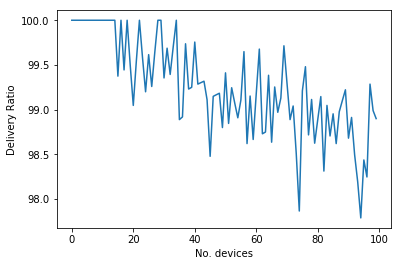

In [57]:
noDev = 100 #Number of devices
noSim = 10          #Number of simulations
ToA = 110     # Message of time on air
sim = np.zeros((noDev, 3))   # Number of devices in simulation matrix
collInSim = np.zeros((noDev, 1))  # Percentage of collisions calculated from simulation matric matrix ()
noCollision = 0

for r in range(noDev):
    for h in range(noSim):
        list = set()
        for i in range(r):
            sim[i][0] = random.uniform(0, ((1000 * 60 * 12) -ToA))   # Time signal ranging from 0 to 1000. 1000 = 1s
                        
            sim[i][1] = random.uniform(-60,-120) #Random RSSI value
            #Single channel GW. So onl one SF Chan used
            
        for i in range(0,r):  #Check all packet collisions 
            for j in range(0,r):
                
                end = sim[j][0]+ToA;   # Calculate end time of transmission
                
                if( i!=j and sim[i][0]>sim[j][0] and sim[i][0]<end ):  #Check if collision occured
                    if(sim[i][1]>sim[j][1]): ## Check which message has a larger RSSI value
                        list.add(j);
                    else:
                        list.add(i);
        noCollision += len(list);
    collInSim[r][0]= 100 - noCollision/(noSim*(r+1))*100   #Calculate the delivery ratio
    
    noCollision=0    #Reset the simulation
    
pl.xlabel('No. devices')
pl.ylabel('Delivery Ratio')
pl.plot(collInSim)
pl.show()


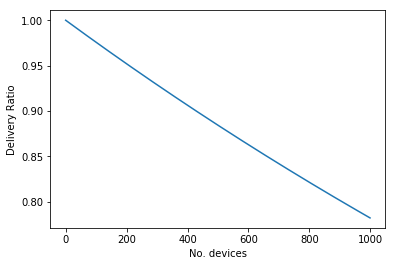

In [3]:

num_dev = 1000 #Number of devices
N = 10          #Number of simulations
ToA = 110     # Message of time on air
dev = np.zeros((num_dev, 3))   # Number of devices in simulation matric
devs = np.zeros((num_dev, 1))  # Percentage of collisions calculated from simulation matric matrix ()
coll = 0

for r in range(num_dev):

    devs[r][0]= np.exp(-2 * (0.0123/100)*r)
    
    
pl.xlabel('No. devices')
pl.ylabel('Delivery Ratio')
pl.plot(devs)
pl.show()

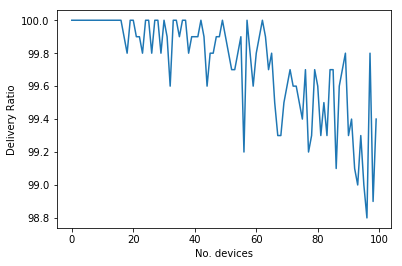